In [7]:
from texas_hold_em_utils.player import KellyMaxProportionPlayer
from texas_hold_em_utils.game import Game

In [8]:
game = Game(num_players=2)
p1 = KellyMaxProportionPlayer(0)
p2 = KellyMaxProportionPlayer(1, round_proportions=[0.5,0.5,0.5,0.5])

game.players = [p1, p2]

In [9]:
game.run_round()

In [10]:
p2.chips

1020

In [11]:
game.round

0

In [12]:
import pandas as pd

# data = pd.DataFrame(columns=['final_round', 'full_kelly_stack', 'half_kelly_stack'])

# for i in range(1000):
#     game = Game(num_players=2)
#     if i % 2 == 0:
#         full = KellyMaxProportionPlayer(0)
#         half = KellyMaxProportionPlayer(1, round_proportions=[0.5,0.5,0.5,0.5])
#         game.players = [full, half]
#     else:
#         full = KellyMaxProportionPlayer(1)
#         half = KellyMaxProportionPlayer(0, round_proportions=[0.5,0.5,0.5,0.5])
#         game.players = [half, full]
        
#     game.run_round()
#     data = pd.concat([data, pd.DataFrame(data={'final_round': [game.round], 'full_kelly_stack': [full.chips], 'half_kelly_stack': [half.chips]})])
    
# data

In [13]:
data['full_kelly_stack'].mean()

NameError: name 'data' is not defined

In [100]:
data['half_kelly_stack'].mean()

996.57

# Optimizing 2 player games with constant proportion

In [123]:
import random
import math

# data = pd.DataFrame(columns=['kelly_proportion', 'stack'])

# for i in range(100000):
#     game = Game(num_players=2)
#     p1_prop = math.ceil(random.random() * 20) / 20.0
#     p2_prop = math.ceil(random.random() * 20) / 20.0
#     p1 = KellyMaxProportionPlayer(0, round_proportions=[p1_prop,p1_prop,p1_prop,p1_prop])
#     p2 = KellyMaxProportionPlayer(1, round_proportions=[p2_prop,p2_prop,p2_prop,p2_prop])
#     game.players = [p1, p2]
#     game.run_round()
#     data = pd.concat([data, pd.DataFrame(data={'kelly_proportion': [p1_prop, p2_prop], 'stack': [p1.chips, p2.chips]})])
    

C:\Users\amarl\AppData\Local\Temp\ipykernel_3056\2549534992.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame(data={'kelly_proportion': [p1_prop, p2_prop], 'stack': [p1.chips, p2.chips]})])


In [124]:
# data.to_csv('data/2_player_kelly_player_optimization.csv')

In [14]:
data = pd.read_csv('data/2_player_kelly_player_optimization.csv')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

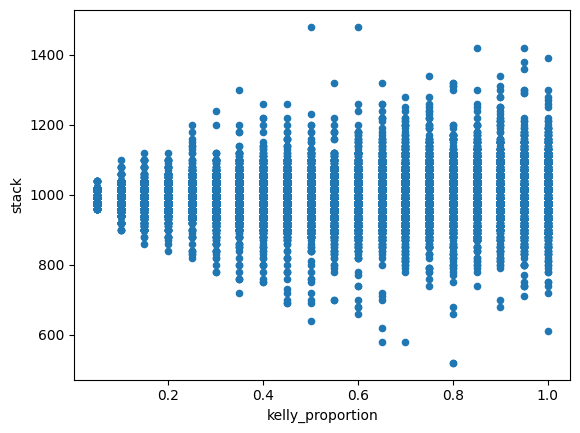

In [15]:
data.plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

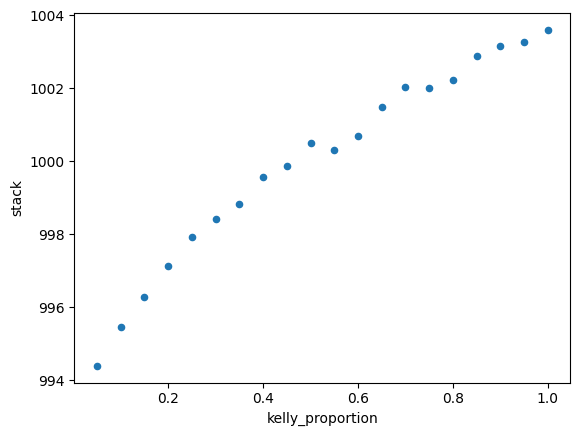

In [17]:
data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

There's a pretty clear linear relationship here, as the proportion increases the expected return does... but I think this might have soemthing to do with the way the test was set up. If you're more aggressive than the opponent you're likely to make them fold even if they have a better hand. From work in game theory by smarter people than I, the common consensus is that the more uncertain you are of the accuracy of your chance of winning, the smaller your ideal bet size should be. But maybe this is an artifact of the simple heads-up game... Try multi-player games and see what happens. Also might help to separate by round

<Axes: xlabel='kelly_proportion', ylabel='stack'>

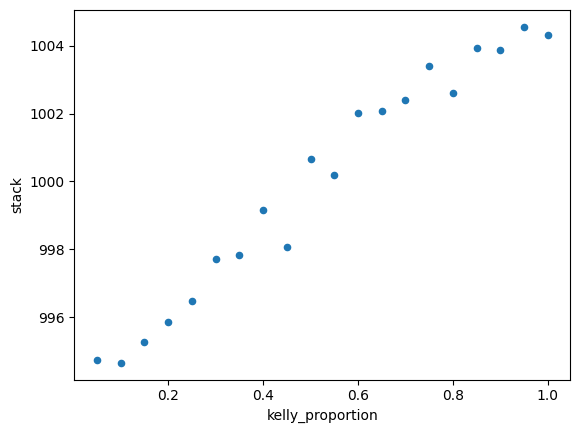

In [19]:
three_p_data = pd.read_csv('data/3_player_kelly_proportions.csv')
three_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

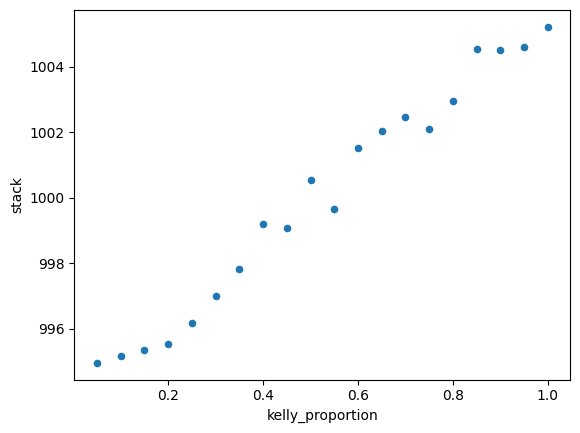

In [20]:
four_p_data = pd.read_csv('data/4_player_kelly_proportions.csv')
four_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

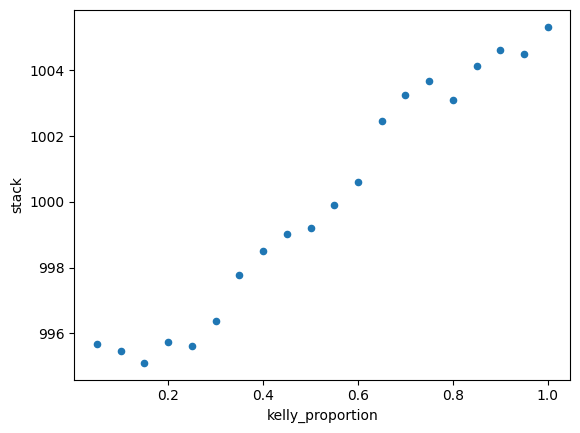

In [21]:
five_p_data = pd.read_csv('data/5_player_kelly_proportions.csv')
five_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

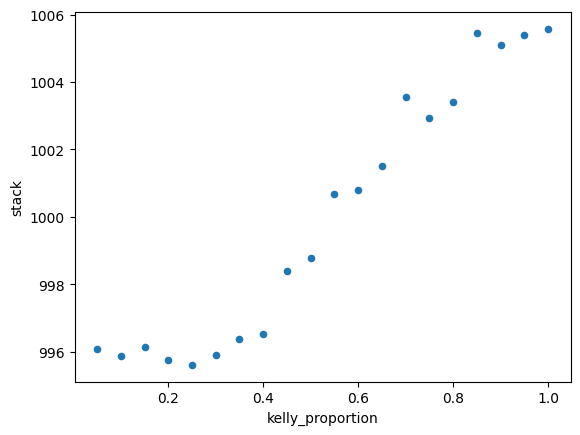

In [22]:
six_p_data = pd.read_csv('data/6_player_kelly_proportions.csv')
six_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

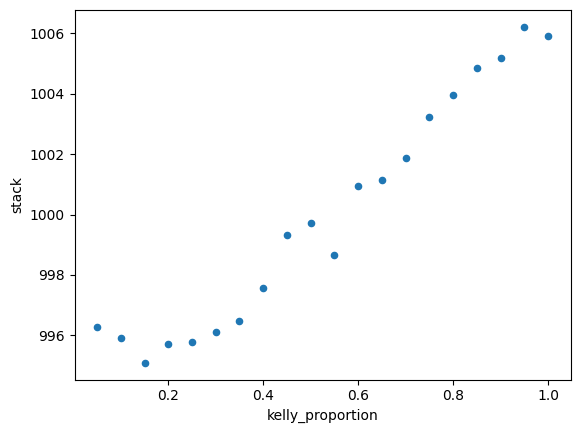

In [23]:
seven_p_data = pd.read_csv('data/7_player_kelly_proportions.csv')
seven_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

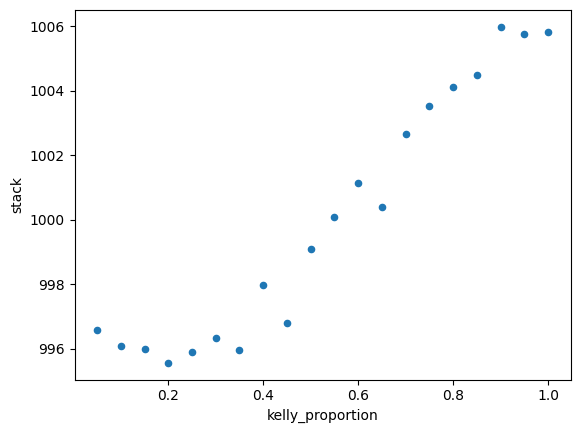

In [24]:
eight_p_data = pd.read_csv('data/8_player_kelly_proportions.csv')
eight_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

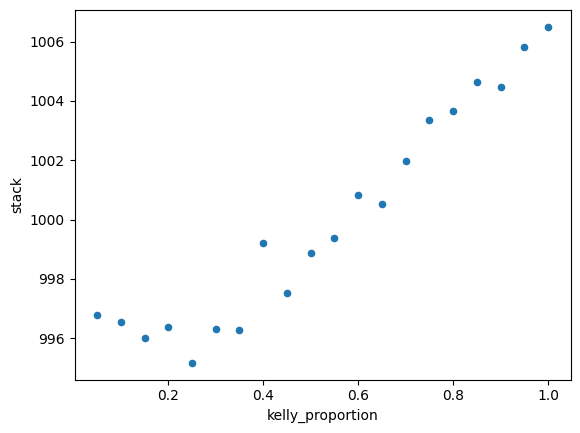

In [25]:
nine_p_data = pd.read_csv('data/9_player_kelly_proportions.csv')
nine_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

<Axes: xlabel='kelly_proportion', ylabel='stack'>

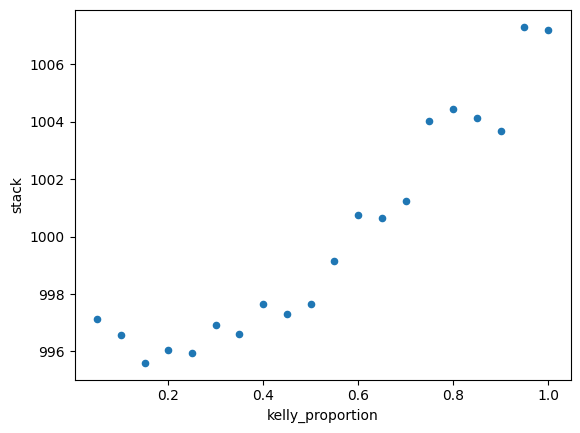

In [26]:
ten_p_data = pd.read_csv('data/10_player_kelly_proportions.csv')
ten_p_data.groupby('kelly_proportion', as_index=False).mean().plot(x='kelly_proportion', y='stack', kind='scatter')

none of those suggest anything different. Not sure what to do to test if that's an issue. Maybe there's a chance it's not an issue. Give it a shot?